In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime


import seaborn as sns

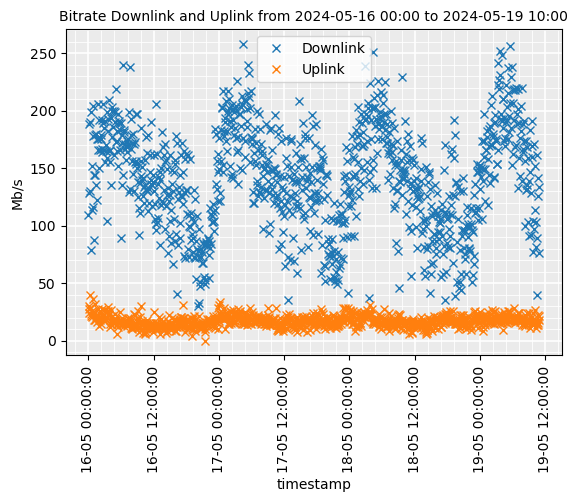

In [2]:
dateBegin1 = '2024-05-16 00'
dateEnd1 = '2024-05-19 10'
dateBegin1_obj = datetime.strptime(dateBegin1, '%Y-%m-%d %H')
dateBegin1_str = dateBegin1_obj.strftime('%Y-%m-%d %H:%M')

dateEnd1_obj = datetime.strptime(dateEnd1, '%Y-%m-%d %H')
dateEnd1_str = dateEnd1_obj.strftime('%Y-%m-%d %H:%M')
file1 = 'downlink_receiver.csv'
df1 = pd.read_csv(file1)
df1['timestamp'] = pd.to_datetime(df1['timestamp'])
df1 = df1.set_index('timestamp')

file2 = 'uplink_receiver.csv'
df2 = pd.read_csv(file2)
df2['timestamp'] = pd.to_datetime(df2['timestamp'])
df2 = df2.set_index('timestamp')
data_range1 = df1.loc[dateBegin1:dateEnd1]
data_range2 = df2.loc[dateBegin1:dateEnd1]


bitrate1 = pd.to_numeric(data_range1['bitrate'])
bitrate2 = pd.to_numeric(data_range2['bitrate'])

fig, ax = plt.subplots()
#P0.plot(ax=ax)
#bitrate.plot(ax=ax)
bitrate1.plot(ax=ax,ls='', marker='x')
bitrate2.plot(ax=ax,ls='', marker='x')
#bitrate2.plot(ax=ax)


#set major ticks format
title_str = f'Bitrate Downlink and Uplink from {dateBegin1_str} to {dateEnd1_str}'
plt.ylabel('Mb/s')
plt.title(title_str, fontsize=10)
ax.set_facecolor('#EBEBEB')
ax.grid(which='major', color='white', linewidth=1.2)
ax.grid(which='minor', color='white', linewidth=0.6)
ax.minorticks_on()
ax.legend(['Downlink','Uplink'])

#set ticks every hour
ax.xaxis.set_major_locator(mdates.HourLocator(interval=12))
for label in ax.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')
ax.tick_params(which='minor', bottom=False, left=False)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M:%S'))

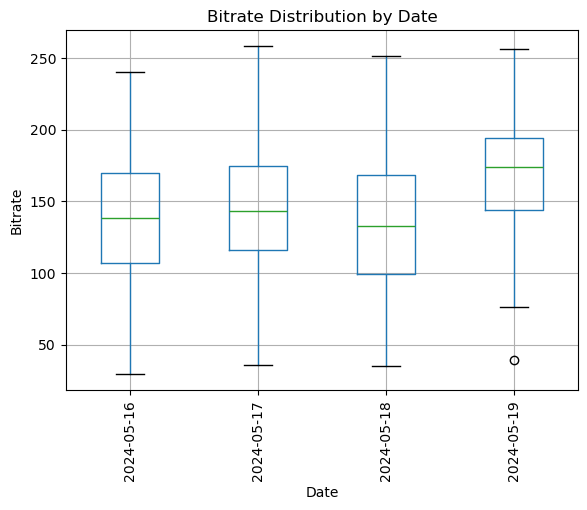

In [3]:
fig, ax = plt.subplots()
dates = data_range1.index.date
hours = data_range1.index.hour
data_range1=data_range1.assign(dates=dates)
data_range1=data_range1.assign(hours=hours)
data_range1.boxplot(ax=ax,column='bitrate',by='dates')
for label in ax.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')

ax.get_figure().suptitle("")
ax.set_title('Bitrate Distribution by Date')
ax.set_xlabel('Date')
ax.set_ylabel('Bitrate')
plt.show()

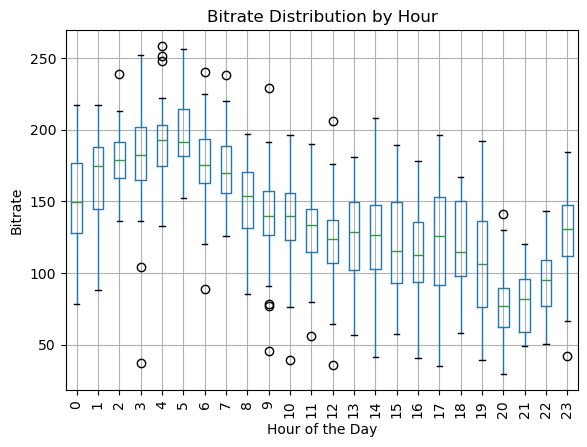

In [4]:
fig, ax = plt.subplots()
hours = data_range1.index.hour
data_range1=data_range1.assign(dates=dates)
data_range1=data_range1.assign(hours=hours)
data_range1.boxplot(ax=ax,column='bitrate',by='hours')
for label in ax.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')

ax.get_figure().suptitle("")
ax.set_title('Bitrate Distribution by Hour')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Bitrate')
plt.show()